In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_rooms만 20433의 특성을 가지고 있다. 이 뜻은 207개의 구역은 이 특성을 가지고 있지 않다는 뜻이다.

In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


std행은 표준 편차를 나타낸다<br>
25%, 50%, 75%는 백분위수를 나타낸다.



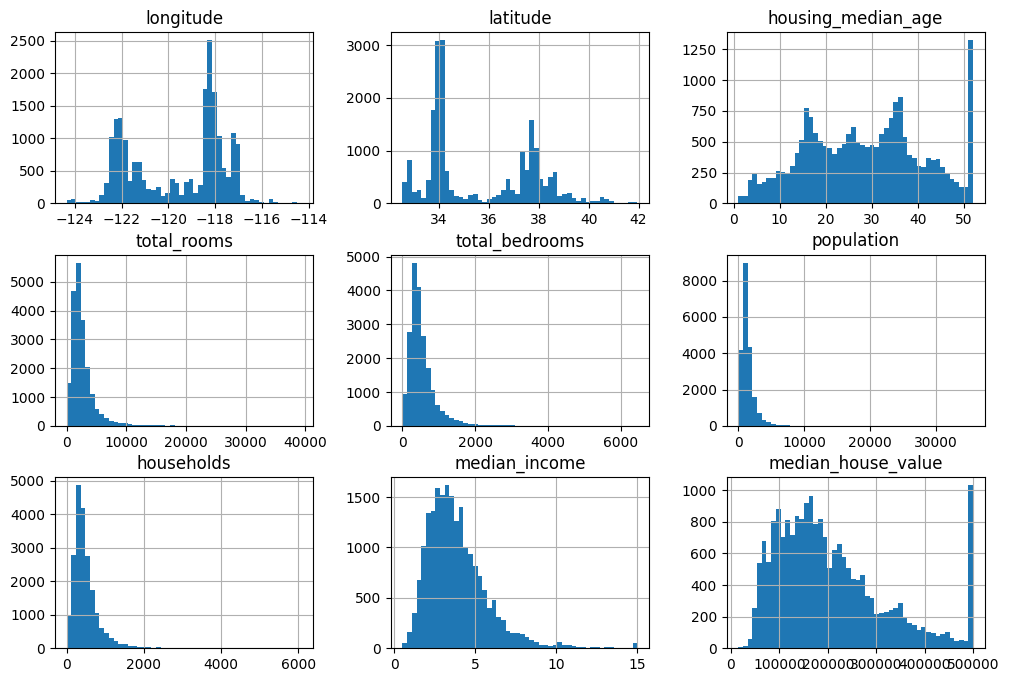

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

5개를 가진 소득 카테고리 특성을 만든다.<br>
예를들어 카테고리 1은 0~1.5($15,00 이하) 이다.

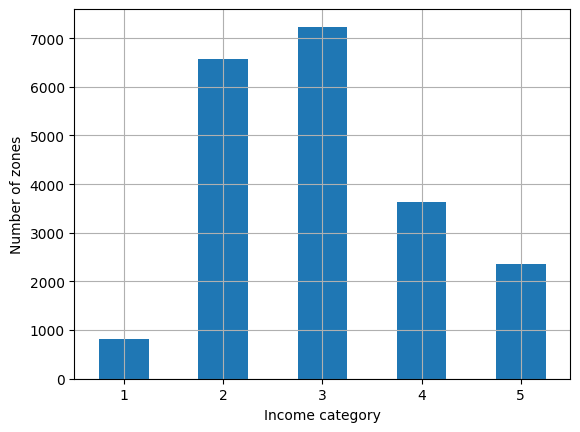

In [9]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of zones")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])


__split()__ 메서드는 훈련과 테스트 데이터 자체가 아니라 __인덱스__ 를 반환한다.
<br>
여러 개로 분할하면 모델의 성능을 더 잘 추정할 수 있다.
<br>
n_splits = 10이라는 뜻은 10개의 계층으로 분할한다는 뜻이다.

하나의 분할이 필요하다면 간편하게 만들 수 있다.

In [11]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
housing = strat_train_set.copy()

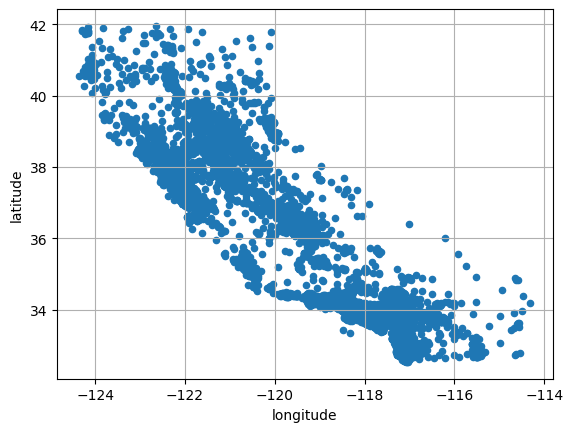

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

캘리포니아 지역을 잘 나타내지만 특별한 패턴을 찾기 힘들다. __alpha__ 옵션을 0.2 주면 데이터 포인트가 밀집된 영역을 잘 보여준다.

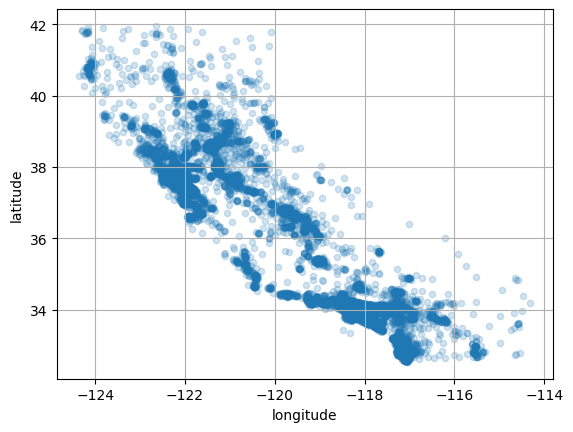

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

원의 반지름은 구역의 인구를 나타내고(매개변수 s)<br>
색상은 가격을 나타낸다(매개변수 c)<br>
여기서 미리 정의된 컬러 맵 중 파란색(낮은 가격) -> 빨간색(높은 가격)까지 범위를 가지는 jet을 사용한다.(매개변수 cmap)

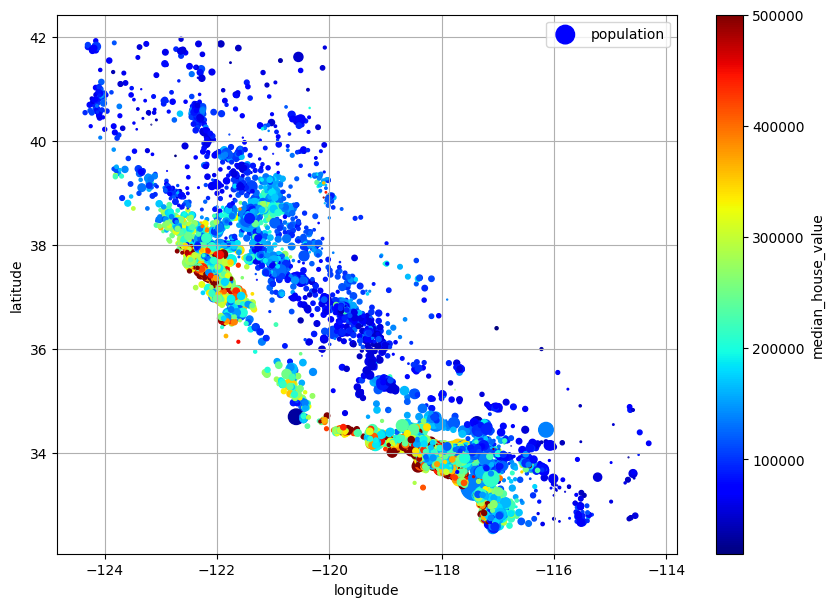

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, figsize=(10, 7))
cax = plt.gcf().get_axes()[1]
cax.set_ylabel("median_house_value")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

주택 가격은 지역 및 인구 밀도와 관련성이 높은걸 알 수 있다.<br>
군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있다.

# dataset이 너무 크지 않으므로 모든 특성 간의 __standard correlation coefficient(표준 상관계수)__ 를 이용해 쉽게 계산 가능하다.
## 표준 상관 계수
상관계수 산정 방식에는  **피어슨 상관계수, 켄달-타우 상관계수, 스피어먼 상관계수**  를 사용한다.
* 피어슨 상관계수 : 코시-슈바르츠 부등식에 의해 +1 ~ -1 사이의 값을 가진다. +1인 경우 양의 선형 관계, -1인 경우 음의 상관 관계, 0의 경우 상관관계를 갖지 않는다.
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/400px-Correlation_coefficient.png">
출처 : https://wikidocs.net/157461
* 켄달-타우상관계수 : 두 변수들간의 순위를 비교해서 연관성을 계산하는 방법이다.
* 스피어먼 상관계수 : 두 변수의 순위 값 사이의 피어슨 상관 계수와 같다.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [18]:
corr_matrix = housing.corr(numeric_only=True)

numeric_only = True인 경우 숫자, 소수 bool 값이 있는 열에대해서만 연산을 수행한다.

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

median_house_value는 median_income이 올라갈 때 증가하는 경향이 있다.<br>
latitude와 중간 주택 가격 사이에는 약한 음의 상관관계가 보인다.(즉, 북쪽으로 갈 수록 주택 가격이 조금씩 내려가는 경향이 있다.)

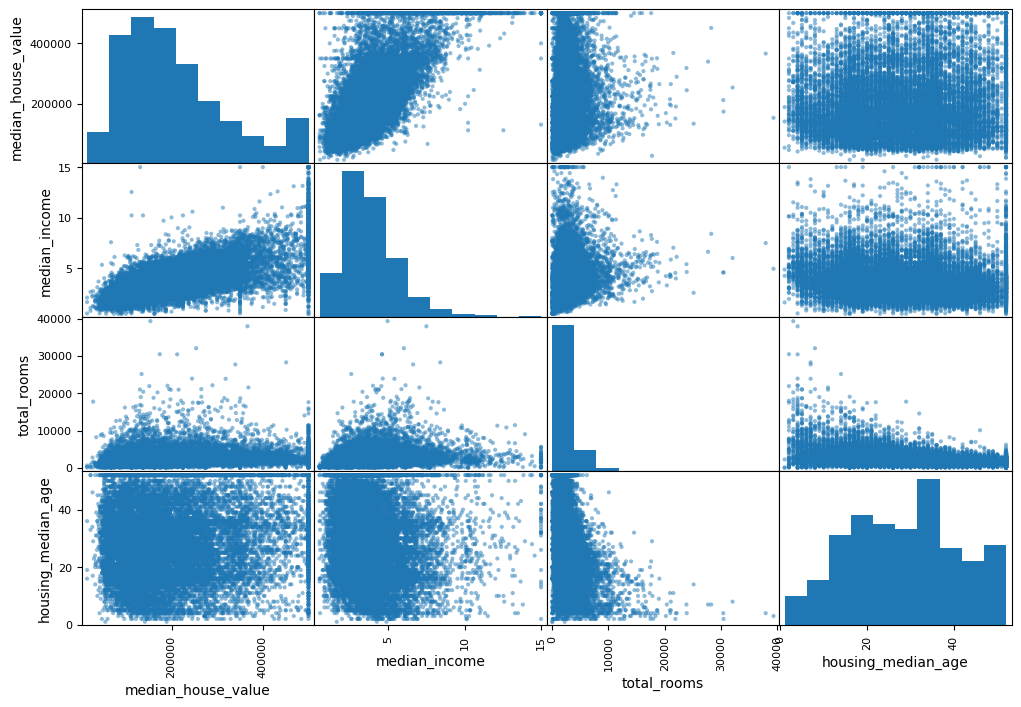

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

산점도 행령을 보면 중간 주택 가격(median_house_value)을 예측하는 데 중간소득(median_income)이 가장 유용해 보인다.

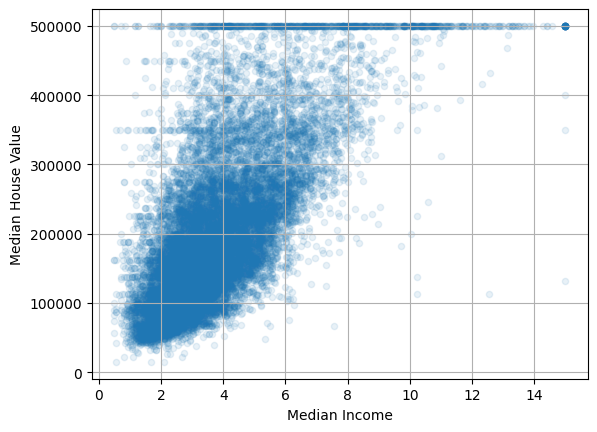

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, alpha=0.1)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [24]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
X = imputer.transform(housing_num)

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [28]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

cateogories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있다.<br>
범주형 특성마다 ID 카테고리 배열을 담은 리스트가 반환된다.

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

카테고리가 '<1H OCEAN'일 때 한 특성이 1이고(그 외 특성은 0), 카테고리가 'INLAND'일 때 다른 한 특성이 1이 되는 식이다.<br>
한 특성만 1이고(핫) 나머지는 0이므로 이를 __원-핫 인코딩__ 이라고 부른다.

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [31]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

# min-max 정규화
각 특성에 대해서 0~1 범위에 들도록 값을 이동하고 스케일을 조정한다.

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

# 표준화
평균을 뺸 후 표준 편차로 나눈다.

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


# 변환 파이프라인

In [36]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [39]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [40]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # 사이킷런 1.2버전에서 최상의 결과를 찾기 위해 반복하는 횟수를 지정하는 `n_init` 매개변수 값에 `'auto'`가 추가되었습니다.
        # `n_init='auto'`로 지정하면 초기화 방법을 지정하는 `init='random'`일 때 10, `init='k-means++'`일 때 1이 됩니다.
        # 사이킷런 1.4버전에서 `n_init`의 기본값이 10에서 `'auto'`로 바뀝니다. 경고를 피하기 위해 `n_init=10`으로 지정합니다.
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [45]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # get_feature_names_out에 사용

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
    remainder=default_num_pipeline)  # 남은 특성: housing_median_age


In [46]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [50]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__클러스터 0 유사도', 'geo__클러스터 1 유사도',
       'geo__클러스터 2 유사도', 'geo__클러스터 3 유사도', 'geo__클러스터 4 유사도',
       'geo__클러스터 5 유사도', 'geo__클러스터 6 유사도', 'geo__클러스터 7 유사도',
       'geo__클러스터 8 유사도', 'geo__클러스터 9 유사도',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x123...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12264b680>)])),
                ('linearregression', LinearRegression())])

In [54]:
housing_predictions = lin_reg.predict(housing)

In [55]:
print(housing_predictions[:5].round(-2))
print(housing_labels[:5].values)

[ 70700. 288200. 186000. 189700. 270700.]
[ 72100. 279600.  82700. 112500. 238300.]


In [73]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_rmse)
print(lin_rmse)

69239.95619019217


대부분 구역의 중간 주택 가격은 120,000불 에서 265,000불 사이 이다. 그러므로 예측 오차가 69,239불인 것은 매우 만족스럽지 못하다.<br>
이는 모델이 훈련 데이터에 과소적합된 사례이다.<br>
특성들이 충분한 정보를 제공하지 못했거나 모델이 충분히 강력하지 않다는 뜻이다.<br>


In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x123...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12264b680>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [76]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_rmse)
print(tree_rmse)

0.0


오차가 0이지만 모델이 데이터에 심하게 과대적합되었을 가능성이 높다.

# 교차 검증으로 평가하기

__K-fold cross_validation__ 기능을 사용할 수 있다.<br>
훈련 세트를 __fold__ 라 불리는 중복되지 않은 10개의 서브셋으로 랜덤으로 불할한다.<br>
그런 다음 결정 트리 모델을 10번 훈련하고 평가하는데, 매번 다른 __fold__ 를 선택해 평가에 사용한다.

In [79]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [80]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67222.995977
std       3918.520742
min      58898.978399
25%      65673.581208
50%      67195.125565
75%      69494.553444
max      73180.532285
dtype: float64

평균 RMSE가 약 67,222이고 표준 편차가 약 3918이다.<br>
이전의 RMSE가 0을 나온것은 과대적합 됐다는 의미이다.

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [82]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47196.080803
std       2518.953159
min      43480.358064
25%      45295.803304
50%      47347.433859
75%      48761.308355
max      51158.799732
dtype: float64

다른 강력한 모델을 사용하니 평균이 약 47,196이고 표준 편차가 약 2518이다.<br>
이전 모델들 보다 훨씬 성능이 좋아보인다.

# 모델 미세 튜닝

## 그리드 서치
탐색하고자 하는 하이퍼파라미터를 정하면 교차 검증을 통해 모든 하이퍼파라미터 조합을 평가한다.

In [84]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters' : [5, 8, 10],
     'random_forest__max_features' : [4, 6, 8]},
    {'preprocessing__geo__n_clusters' : [10, 15],
     'random_forest__max_features' : [6, 8, 10]}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12264b680>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

'preprocessing__geo__n_clusters'를 이중 밑줄 문자를 기준으로 나누고 파이프라인에서 "preprocessing"이란 이름의 추정기를 갖는다.<br>
그러면 결국 전처리 ColumnTransformer를 찾게 된다.<br>
그 다음 ColumnTransformer 안에서 "aeo"란 이름의 변환기를 찾는다. 그 다음 이 변환기의 n_clusters 하이퍼파라미터를 찾는다.

In [85]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [86]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by=['mean_test_score'], ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.141139,0.041889,0.079032,0.001094,15,6,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}",-42841.092308,-44286.939181,-44953.711747,-44027.247745,881.804950,1
6,2.055135,0.028790,0.077795,0.001111,10,4,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 4}",-43584.491070,-44459.923019,-45406.274917,-44483.563002,743.927968,2
13,4.073087,0.056764,0.080348,0.000618,15,8,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 8}",-43665.507479,-44474.867271,-45582.794892,-44574.389881,785.886471,3
7,2.900375,0.036890,0.078141,0.000772,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44112.113955,-44873.307502,-45890.107614,-44958.509691,728.358851,4
9,2.937912,0.020553,0.081964,0.005904,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44112.113955,-44873.307502,-45890.107614,-44958.509691,728.358851,4


## 랜덤 서치
하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV가 종종 선호 된다.<br>
그리디 서치와 같은 방식을 사용하지만 가능한 모든 조합을 시도하는 대신 각 반복마다 __하이퍼파라미터에 임의의 수를 대입하여__ 지정한 횟수만큼 평가한다.

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters' : randint(low=3, high=50),
                  'random_forest__max_features' : randint(low=2, high=20),}

rnd_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x12264b680>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x122348f20>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1223f4d10>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [88]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by=['mean_test_score'], ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,4.942078,0.131189,0.088467,0.005679,45,9,"{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}",-41647.442138,-42970.861752,-43352.626990,-42656.976960,730.664808,1
8,3.831755,0.035142,0.082047,0.000508,32,7,"{'preprocessing__geo__n_clusters': 32, 'random_forest__max_features': 7}",-41858.401126,-43487.709543,-43575.195634,-42973.768768,789.492321,2
5,2.495969,0.013436,0.082404,0.000743,42,4,"{'preprocessing__geo__n_clusters': 42, 'random_forest__max_features': 4}",-41931.467729,-44216.304378,-43551.069739,-43232.947282,959.521079,3
6,1.845646,0.006965,0.082586,0.000889,24,3,"{'preprocessing__geo__n_clusters': 24, 'random_forest__max_features': 3}",-42181.257487,-44260.876786,-43899.375570,-43447.169948,907.219764,4
0,8.095736,0.215393,0.081403,0.003587,41,16,"{'preprocessing__geo__n_clusters': 41, 'random_forest__max_features': 16}",-42546.555880,-43496.910871,-44433.805124,-43492.423958,770.472810,5


## 최상의 모델과 오차 분석
정확한 예측을 만들기 위해 각 특성의 상대적인 중요도를 알려준다.

In [91]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.18, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.02,
       0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01, 0.03, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [95]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()))

[(np.float64(2.691595614786875e-07), 'cat__ocean_proximity_ISLAND'),
 (np.float64(0.00012565927491107174), 'cat__ocean_proximity_NEAR BAY'),
 (np.float64(0.0018236571722017115), 'cat__ocean_proximity_NEAR OCEAN'),
 (np.float64(0.003671813261309296), 'cat__ocean_proximity_<1H OCEAN'),
 (np.float64(0.0038626198281910347), 'geo__클러스터 8 유사도'),
 (np.float64(0.0039858606001746235), 'geo__클러스터 40 유사도'),
 (np.float64(0.004930124791779361), 'geo__클러스터 14 유사도'),
 (np.float64(0.005115789347391392), 'geo__클러스터 7 유사도'),
 (np.float64(0.005645260234506817), 'geo__클러스터 42 유사도'),
 (np.float64(0.0060023558393333745), 'log__total_bedrooms'),
 (np.float64(0.006047334962707391), 'log__households'),
 (np.float64(0.006389890782651786), 'geo__클러스터 32 유사도'),
 (np.float64(0.006616234811870666), 'geo__클러스터 39 유사도'),
 (np.float64(0.006766646232405828), 'geo__클러스터 31 유사도'),
 (np.float64(0.006804891399646699), 'log__total_rooms'),
 (np.float64(0.006907653318879322), 'log__population'),
 (np.float64(0.00709545849315

In [96]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_rmse)
print(final_rmse)

39768.9801422105


# 론칭, 모니터링, 시스템 유지 보수

In [ ]:
import joblib

joblib.dump(final_model, "final_model.pkl")

# 연습 문제